<a href="https://colab.research.google.com/github/darkaesthetic07/stock_price_pred/blob/main/amzn_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
amzn_data = pd.read_csv("AMZN_dataset.csv")

In [ ]:
amzn_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,06-09-2021,$3281.15,2455530,$3272.87,$3297.58,$3270.7
1,06-08-2021,$3264.11,3416730,$3222.61,$3279.5321,$3218.01
2,06-07-2021,$3198.01,2215756,$3197.33,$3208,$3172.2
3,06-04-2021,$3206.22,2249749,$3212,$3221,$3198.81
4,06-03-2021,$3187.01,2398293,$3204.23,$3214.435,$3184.03


In [ ]:
amzn_data.describe()

,Volume
count,2.516000e+03
mean,4.207630e+06
std,2.295011e+06
min,8.813370e+05
25%,2.737498e+06
50%,3.615334e+06
75%,4.936622e+06
max,2.412413e+07


In [ ]:
amzn_data.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [ ]:
amzn_data.nunique()

Date          2516
Close/Last    2487
Volume        2515
Open          2428
High          2455
Low           2467
dtype: int64

In [ ]:
amzn_data['Close/Last'].unique()

array(['$3281.15', '$3264.11', '$3198.01', ..., '$189.96', '$186.29',
       '$186.53'], dtype=object)

In [ ]:
amzn_data.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [ ]:
amzn_data.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [ ]:
amzn_data['Date']=pd.to_datetime(amzn_data.Date)

In [ ]:
amzn_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,$3281.15,2455530,$3272.87,$3297.58,$3270.7
1,2021-06-08,$3264.11,3416730,$3222.61,$3279.5321,$3218.01
2,2021-06-07,$3198.01,2215756,$3197.33,$3208,$3172.2
3,2021-06-04,$3206.22,2249749,$3212,$3221,$3198.81
4,2021-06-03,$3187.01,2398293,$3204.23,$3214.435,$3184.03


In [ ]:
amzn_data.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

In [ ]:
for i in amzn_data.columns.to_list():
    if i not in ["Volume",'Date']:
        amzn_data[i]=amzn_data[i].apply(lambda i:i.replace('$','')).astype(float)

In [ ]:
amzn_data.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


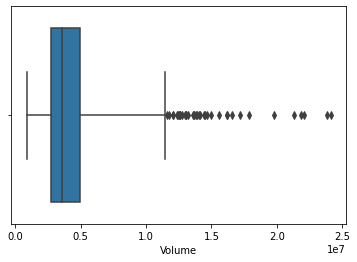

In [ ]:
sns.boxplot(amzn_data['Volume'],whis=3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


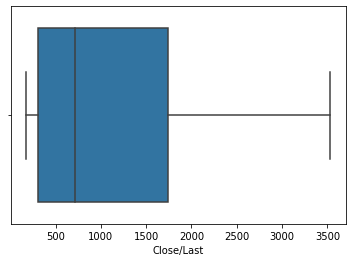

In [ ]:
sns.boxplot(amzn_data['Close/Last'],whis=3)

In [ ]:
#Removing outlier from volume
iqr=np.quantile(amzn_data.Volume,0.75)-np.quantile(amzn_data.Volume,0.25)
max_value=np.quantile(amzn_data.Volume,0.75)+3*iqr
amzn_data.Volume=np.where(amzn_data.Volume>max_value,max_value,amzn_data.Volume)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


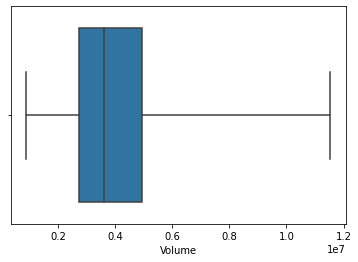

In [ ]:
sns.boxplot(amzn_data['Volume'],whis=3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


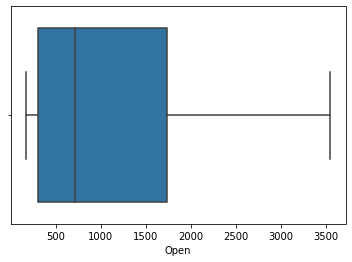

In [ ]:
sns.boxplot(amzn_data['Open'],whis=3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


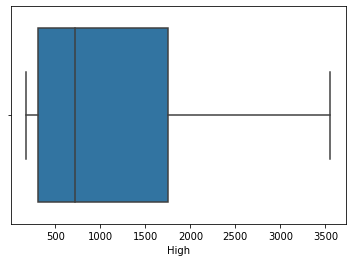

In [ ]:
sns.boxplot(amzn_data['High'],whis=3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


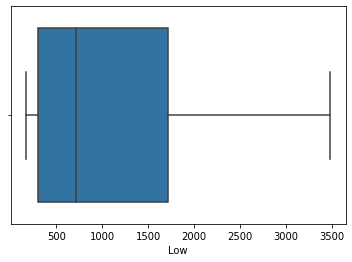

In [ ]:
sns.boxplot(amzn_data['Low'],whis=3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


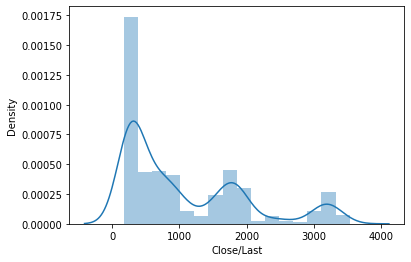

In [ ]:
#checking the distribution of "Close Price"
sns.distplot(amzn_data['Close/Last'])

In [ ]:
#checking correlation
amzn_data.corr()

,Close/Last,Volume,Open,High,Low
Close/Last,1.000000,0.080565,0.999710,0.999857,0.999869
Volume,0.080565,1.000000,0.081678,0.086143,0.075344
Open,0.999710,0.081678,1.000000,0.999881,0.999835
High,0.999857,0.086143,0.999881,1.000000,0.999801
Low,0.999869,0.075344,0.999835,0.999801,1.000000


In [ ]:
#setting date time as index
df2=amzn_data.set_index("Date")

In [ ]:
#Sorting the dataset based on ascending order of dates
df2.sort_values('Date',inplace=True)

Text(0.5, 1.0, 'Close Price history')

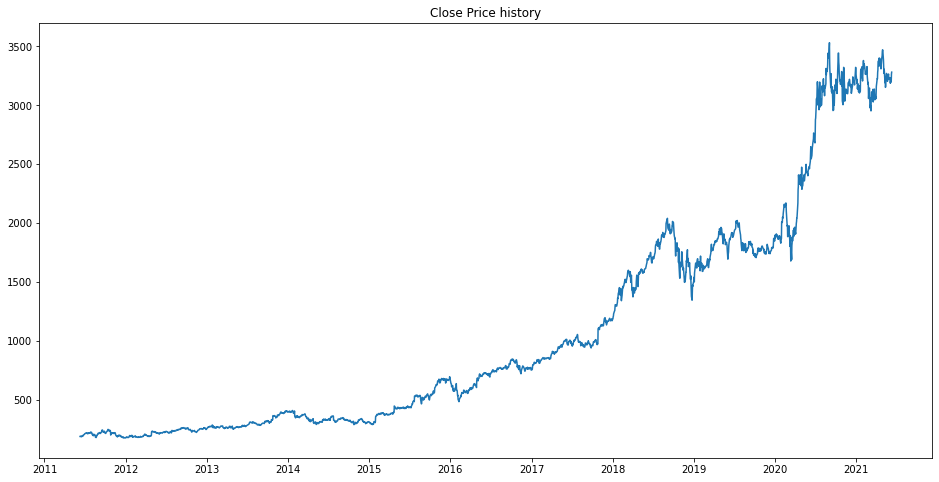

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df2['Close/Last'], label='Close Price history')
plt.title('Close Price history')

Text(0.5, 1.0, 'Open Price history')

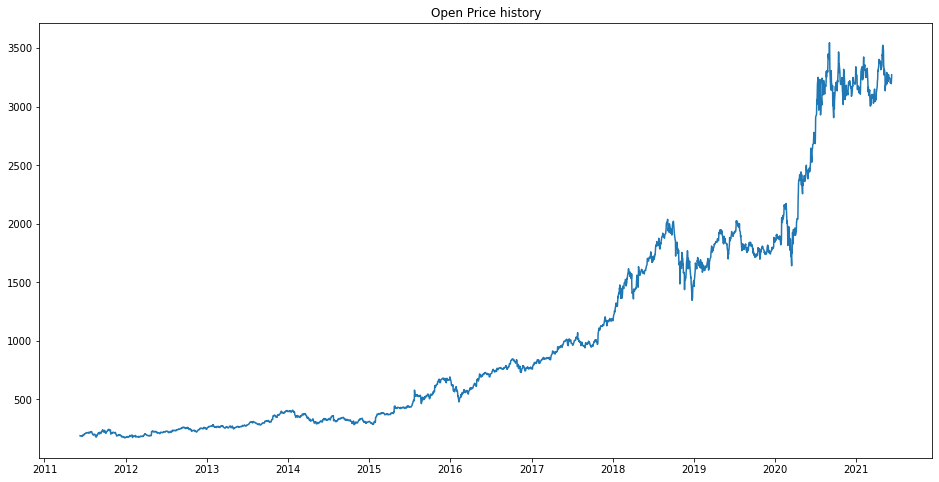

In [69]:
plt.figure(figsize=(16,8))
plt.plot(df2['Open'], label='Open Price history')
plt.title('Open Price history')